In [ ]:
import numpy as np  # import the numpy library functions.
import matplotlib.pyplot as plt # plotting functions
import uncertainties as unc # Uncertainties package.  Good for simple error propagation
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties import umath
import scipy.constants as const
import pandas as pd
%matplotlib inline

In [ ]:
# conversion_const = ufloat(0.295, 0.002)
# chan = 1024
# Vpp = 50
# dwell = 5e-4
# period = 1
# calculations for velocity, the output is in millimeters per second
def velocity_cal(chan, Vpp, conversion_const, dwell, period):
    slope = 2*Vpp/period
    voltages = np.zeros(chan)
    v0 = -1*(Vpp/2)
    for n in range(0, chan):
        if n == 0:
            voltages[0] = v0 + 0.5*slope*dwell
        elif n != 0:
            voltages[n] = voltages[n-1] + (slope*dwell)
    velocities = conversion_const * voltages
    return (velocities[0:1000])
# constant = ufloat(0.295, 0.002)
# velocity_cal(1024, 50, const, 5.0e-4, 1)

In [ ]:
# this will graph the speeds with respect to channel number
# x = np.linspace(0, 999, 1000)
# speeds = velocity_cal(1024, 50.0, constant, 5.0e-4, 1.00)
# y = np.zeros(1000)
# for n in range(1000):
#     y[n] = speeds[n].nominal_value
# plt.plot(x, y)
# plt.title("source velocity as a function of channel number")
# plt.xlabel("channel")
# plt.xlim([0, 1000])
# plt.ylabel("velocity (m/s)")
# plt.show()

In [ ]:
# calculations for relativistic doppler shift in energy, the output is in nano electron volts
const = ufloat(0.295, 0.002)
c = 299792458
proper = ufloat(14.4*10**3, 10**-4)
velocitylist = velocity_cal(1024, 50.0, const, 5.0e-4, 1.00)
def energy_shift(proper_energy, velocities):
    betas = velocities/c
    shift = unumpy.uarray(np.zeros(1000), np.zeros(1000))
    for n in range(1000):
        numerator = 1 + betas[n]
        denominator = 1 - betas[n]
        shift[n] = (proper_energy*((umath.sqrt(numerator)/(umath.sqrt(denominator)  )) - 1 ))
    return shift
#energy_shift(proper, velocitylist)

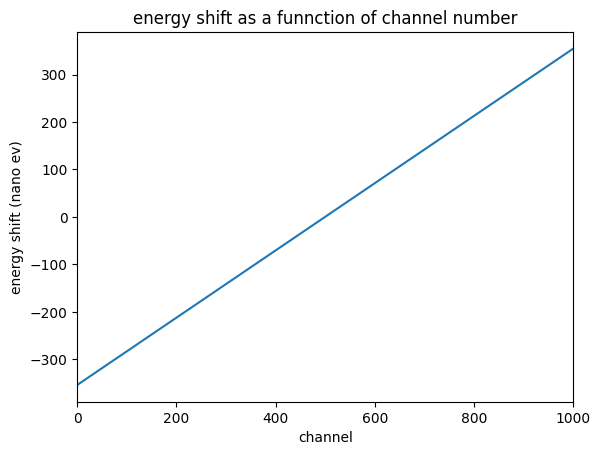

In [83]:
# this will graph the energy shift with respect to channel numgber
# x = np.linspace(0, 999, 1000)
# energies = energy_shift(proper, velocitylist)*(10**9)
# y = np.zeros(1000)
# for n in range(1000):
#     y[n] = energies[n].nominal_value
# plt.plot(x, y)
# plt.title("energy shift as a funnction of channel number")
# plt.xlabel("channel")
# plt.xlim([0, 1000])
# plt.ylabel("energy shift (nano ev)")
# plt.show()